# Check ModelE output against LES for the "FixN" configuration

* The below notebook compares single column model simulations (colors) against a set of LES benchmark simulations (shown in gray).
* All requested 1D and 2D variables are here read and plotted. "load_sims" reports variable that are missing. Lines will not show, if a variable is missing or if it contains missing values.
* In case you find inconsistencies in the benchmark set or wish to expand the code, please contact Ann Fridlind (ann.fridlind@nasa.gov), Timothy Juliano (tjuliano@ucar.edu), and Florian Tornow (ft2544@columbia.edu).

In [22]:
%run functions_plotting.py

## select (grayed out) simulations to plot
sim_keyword_gray_1 = 'DHARMA_Lx25_dx100_FixN.'
sim_keyword_gray_2 = 'WRF_Lx25_dx100_FixN.'

## select LES run(s) of interest
#sim_keyword_col_les = 'DHARMA_Lx25_dx100_FixN_noice.'
sim_keyword_col_scm = 'N_d'


In [28]:
vars_mean_list = pd.read_excel('https://docs.google.com/spreadsheets/d/1Vl8jYGviet7EtXZuQiitrx4NSkV1x27aJAhxxjBb9zI/export?gid=1026157027&format=xlsx',
                              sheet_name='SCM')

## short names
var_vec_1d = np.asarray(vars_mean_list.variable_id[vars_mean_list.dimensions == 'time'])
var_vec_2d = np.asarray(vars_mean_list.variable_id[vars_mean_list.dimensions == 'time, layer'])

var_vec_2d = var_vec_2d[var_vec_2d!='zf']

## long names
var_vec_1d_long = np.asarray(vars_mean_list.standard_name[vars_mean_list.dimensions == 'time'])

## Units
var_vec_1d_units = np.asarray(vars_mean_list.units[vars_mean_list.dimensions == 'time'])
var_vec_2d_units = np.asarray(vars_mean_list.units[vars_mean_list.dimensions == 'time, layer'])

In [32]:
%run functions_plotting.py

## load all simulations located in subfolders of the given directory
df_gray_1d_1,df_gray_2d_1 = load_sims('../../output_les/',var_vec_1d,var_vec_2d,t_shift=-2,keyword=sim_keyword_gray_1,make_gray = 1)
df_gray_1d_2,df_gray_2d_2 = load_sims('../../output_les/',var_vec_1d,var_vec_2d,t_shift=-2,keyword=sim_keyword_gray_2,make_gray = 1)

## example using LES
#df_col_1d_les,df_col_2d_les = load_sims('../../output_les/',var_vec_1d,var_vec_2d,t_shift=-2,keyword=sim_keyword_col_les)

## example using SCM
df_col_1d_scm,df_col_2d_scm = load_sims('../../output_scm/modelE/sandbox/',var_vec_1d,var_vec_2d,t_shift=-2,keyword=sim_keyword_col_scm)


Loading variables: f(time)
../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN.nc
pblh not found in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN.nc
zi not found in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN.nc
cf not found in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN.nc
cflc not found in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN.nc
cfc not found in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN.nc
ssaf shows NAN values in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN.nc
Loading variables: f(time,height)
../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN.nc
pe not found in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN.nc
qi not found in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN.nc
fh not found in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN.nc
fc not found in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN.nc
tke not found in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_Fi

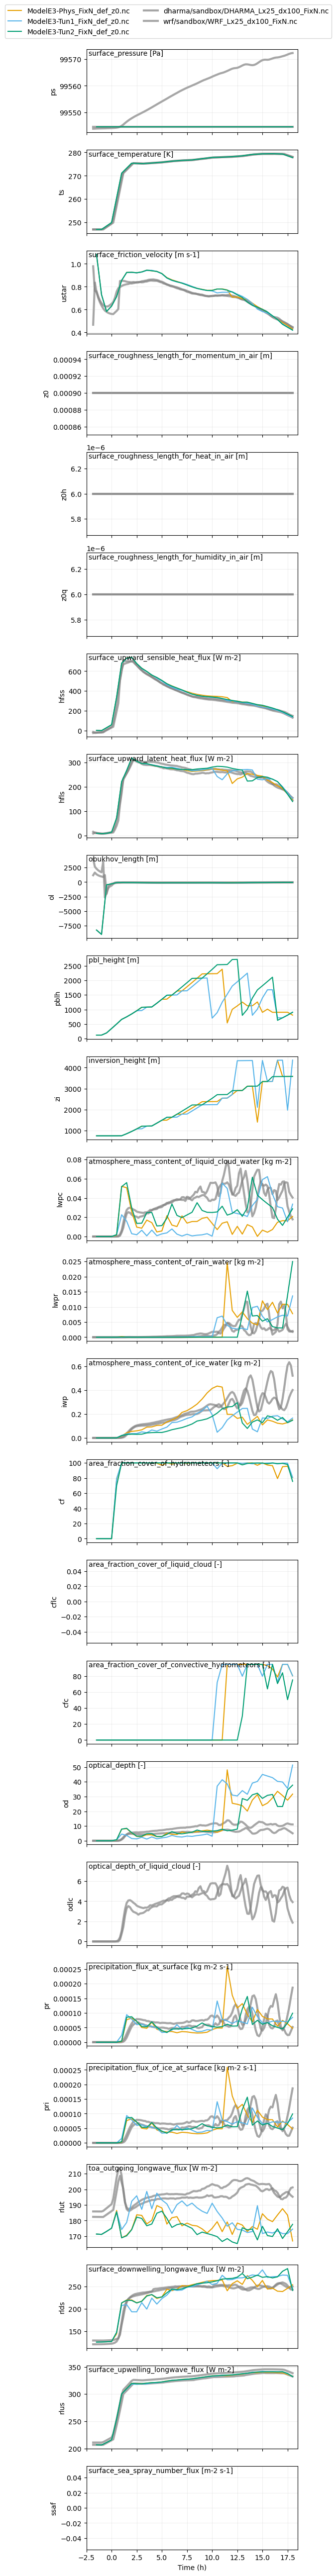

In [4]:
# plot variables that have only time dependence
plot_1d(pd.concat([df_gray_1d_1,df_gray_1d_2,df_col_1d_scm]),var_vec_1d,longnames=var_vec_1d_long,units=var_vec_1d_units)

temporal averaging over 1.0 h interval


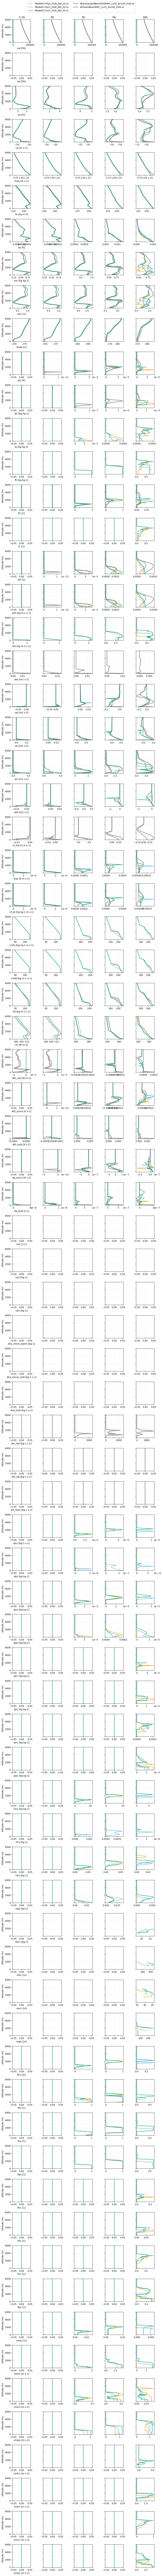

<Figure size 1000x600 with 0 Axes>

In [20]:
## example where ERA5 and radiosonde are included
plot_2d(pd.concat([df_gray_2d_1,df_gray_2d_2,df_col_2d_scm]),
                  var_vec = var_vec_2d,times=[-1.5,0,3,9,18],
        z_max=6000,units=var_vec_2d_units)## example where ERA5 and radiosonde are included


In [23]:
## include observational constraints
## load ERA5 fields
era5_1d, era5_2d = load_era5(PATH='../../data_files/')

## load radiosondes
rs_dat = load_rs(t_filter = 7.)

## load DOE ARM site statistics
kazrkollias_dat = load_kazrkollias(t_filter = 6.,aux_dat=rs_dat) ## here using radiosonde profiles to estimate CTT
kazrclough_dat = load_kazrclough(t_filter = 6.) 
aeri_dat = load_aeri(t_filter = 0.5)
radflux_dat = load_radflux(t_filter = 6.)
srfflux_dat = load_flux(t_filter = 6.)

## load CARRA surface fluxes
carra_dat = load_carraflux()

## load MAC-LWP
maclwp_dat = load_maclwp(t_filter = 0.) 
gongiwp_dat = load_iwpgong(t_filter = 0.)

## load MODIS, VIIRS, and SENTINEL retrievals
modis_dat    = load_modis(t_filter = 0.,sza_filter = 65.)
viirs_dat    = load_viirs(t_filter = 0.,sza_filter = 65.)
sentinel_dat = load_sentinel(t_filter = 0.,sza_filter = 65.)

## load CERES retrievals
ceres_dat = load_ceres(t_filter = 0.)

## load CALIPSO retrievals (note the increased time window)
calipso_dat = load_calipso(t_filter = 3.)

../../data_files/theta_temp_rh_sh_uvw_sst_along_trajectory_era5ml_28h_end_2020-03-13-18.nc
../../data_files/anxsondewnpnM1.b1.20200313.052700.cdf
../../data_files/anxsondewnpnM1.b1.20200313.112600.cdf
../../data_files/anxsondewnpnM1.b1.20200313.172600.cdf
../../data_files/anxsondewnpnM1.b1.20200313.232200.cdf
KAZR (Kollias): here using auxiliary field to estimate cloud-top temperature


/user-data-home/comble-mip/notebooks/plotting/functions_plotting.py:305: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  aux_dat['zdiff'] = np.abs(aux_dat['zf'] - np.float(p_df['zi']))
/user-data-home/comble-mip/notebooks/plotting/functions_plotting.py:306: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  aux_dat['zdiff.25'] = np.abs(aux_dat['zf'] - np.float(p_df['zi.25']))
/user-data-home/comble-mip/notebooks/plotting/functions_plotting.py:307: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  aux_dat['zdiff.75'] = np.abs(aux_dat['zf'] - np.float(p_df['zi.75']))


In [34]:
%run functions_plotting.py

## load all simulations located in subfolders of the given directory
#var_vec_1d = ['lwpr','lwpc','iwp','od'] # variables without ERA5 (shorter time axis)
#var_vec_2d = ['theta','qv','qlc','qlr','qi','ta','ua','va'] #,'qic','qis','qig','ua','va','ta']


df_gray_1d_1,df_gray_2d_1 = load_sims('../../output_les/',var_vec_1d,var_vec_2d,t_shift=-2,keyword=sim_keyword_gray_1,make_gray = 1,diag_zi_ctt=True)
df_gray_1d_2,df_gray_2d_2 = load_sims('../../output_les/',var_vec_1d,var_vec_2d,t_shift=-2,keyword=sim_keyword_gray_2,make_gray = 1,diag_zi_ctt=True)

df_col_1d_scm,df_col_2d_scm = load_sims('../../output_scm/modelE/sandbox/',var_vec_1d,var_vec_2d,t_shift=-2,keyword=sim_keyword_col_scm,diag_zi_ctt=True)
#df_col_1d,df_col_2d = load_sims('../../output_les/',var_vec_1d,var_vec_2d,t_shift=-2,keyword=sim_keyword,diag_zi_ctt=True,subfolder='sand',ignore='ICON')

Loading variables: f(time)
../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN.nc
pblh not found in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN.nc
zi not found in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN.nc
cf not found in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN.nc
cflc not found in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN.nc
cfc not found in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN.nc
ssaf shows NAN values in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN.nc
Loading variables: f(time,height)
../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN.nc
pe not found in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN.nc
qi not found in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN.nc
fh not found in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN.nc
fc not found in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN.nc
tke not found in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_Fi

/opt/conda/lib/python3.11/site-packages/matplotlib/cbook.py:1762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


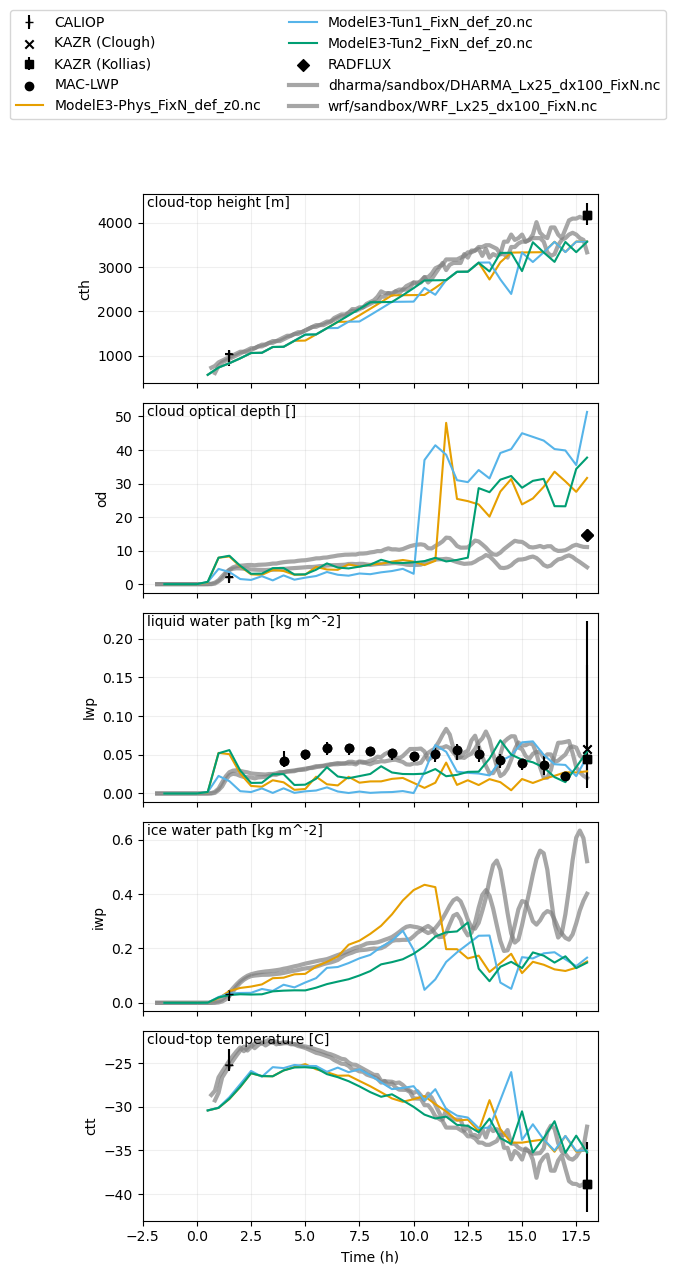

In [25]:
plot_1d(pd.concat([df_gray_1d_1,df_gray_1d_2,df_col_1d_scm,maclwp_dat,kazrkollias_dat,kazrclough_dat,calipso_dat,radflux_dat]),['cth','od','lwp','iwp','ctt'],longnames=['cloud-top height','cloud optical depth','liquid water path','ice water path','cloud-top temperature'],units=['m','','kg m^-2','kg m^-2','C'])


temporal averaging over 1.0 h interval


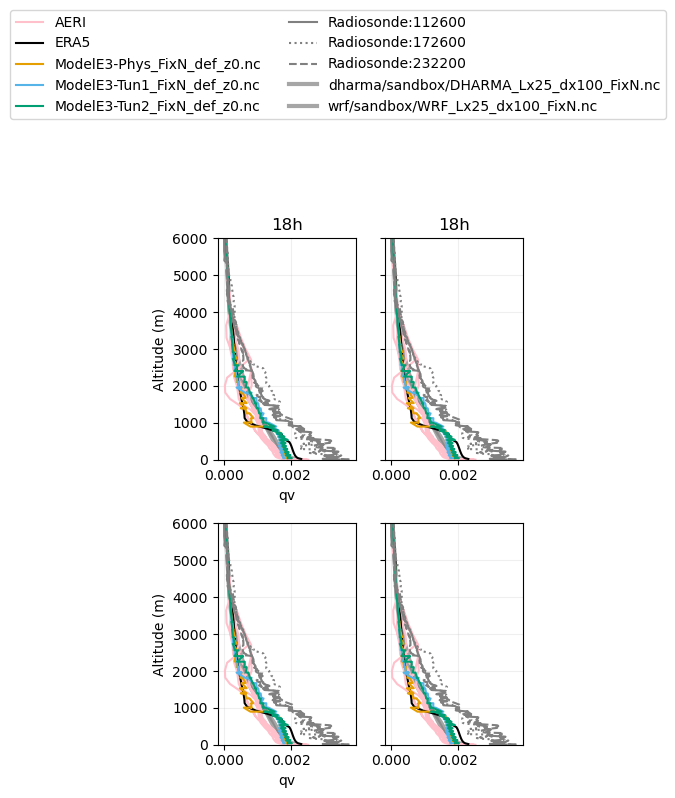

<Figure size 1000x600 with 0 Axes>

In [26]:
%run functions_plotting.py

plot_2d(pd.concat([df_gray_2d_1,df_gray_2d_2,df_col_2d_scm,era5_2d,rs_dat,aeri_dat]),var_vec = ['qv','qv'],times=[18,18],z_max=6000)

In [29]:
var_vec_1d_spec = ['ustar','hfss','hfls','cth','ctt']
var_vec_1d_long_spec = np.hstack([[var_vec_1d_long[(var_vec_1d == vv)][0] for vv in var_vec_1d_spec[0:3]],['cloud-top height','cloud-top temperature']])
var_vec_1d_units_spec = np.hstack([[var_vec_1d_units[(var_vec_1d == vv)][0] for vv in var_vec_1d_spec[0:3]],['m','°C']])

/opt/conda/lib/python3.11/site-packages/matplotlib/cbook.py:1762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/opt/conda/lib/python3.11/site-packages/matplotlib/cbook.py:1762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


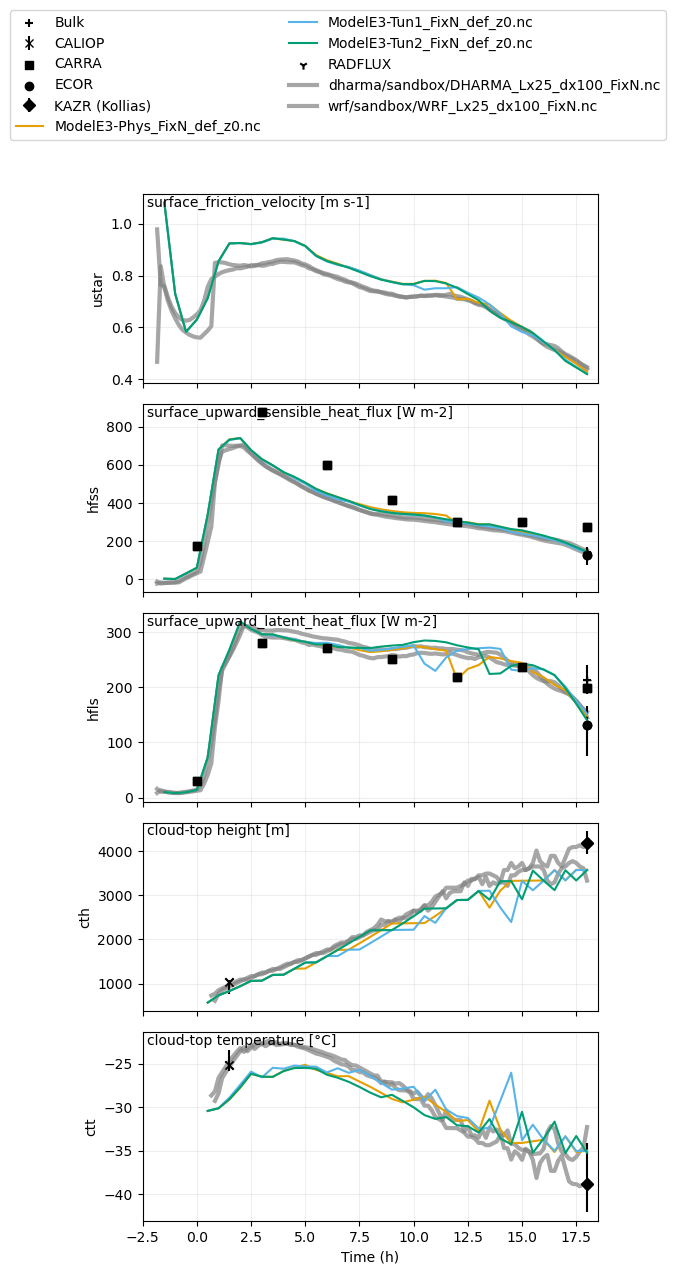

In [39]:
plot_1d(pd.concat([df_gray_1d_1,df_gray_1d_2,df_col_1d_scm,kazrkollias_dat,calipso_dat,radflux_dat,carra_dat,srfflux_dat]),
        var_vec_1d_spec,longnames=var_vec_1d_long_spec,units=var_vec_1d_units_spec)